In [328]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
from scipy.special import factorial
from scipy.stats.distributions import chi2

import warnings
warnings.filterwarnings("ignore")

In [329]:
file = uproot.open("../features/signal_tchannel_reco_E-3TeV_N-1TeV_Wtolnu.root")
df_i = pd.DataFrame(np.array(file['t']['features'].array()))

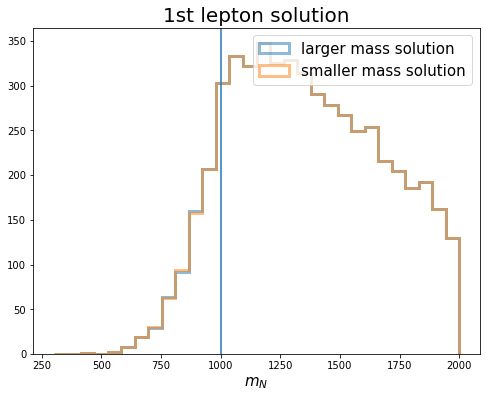

In [330]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)

range_ = [300, 2000]
bins_=30


plt.hist(df_i[['mN11']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
plt.hist(df_i[['mN12']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
plt.axvline(1000)

plt.legend(fontsize=15)
plt.title("1st lepton solution", fontsize=20)
plt.xlabel(r"$m_N$", fontsize=15);

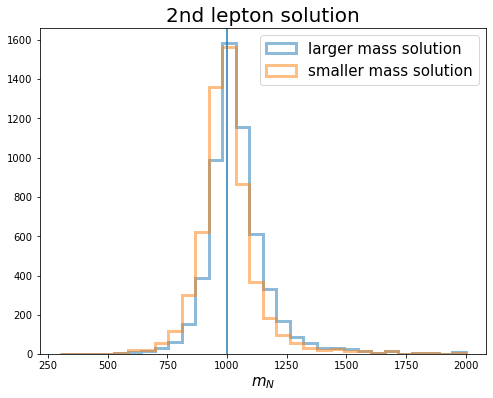

In [331]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)

range_ = [300, 2000]
bins_=30


plt.hist(df_i[['mN21']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
plt.hist(df_i[['mN22']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
plt.axvline(1000)

plt.legend(fontsize=15)
plt.title("2nd lepton solution", fontsize=20)
plt.xlabel(r"$m_N$", fontsize=15);

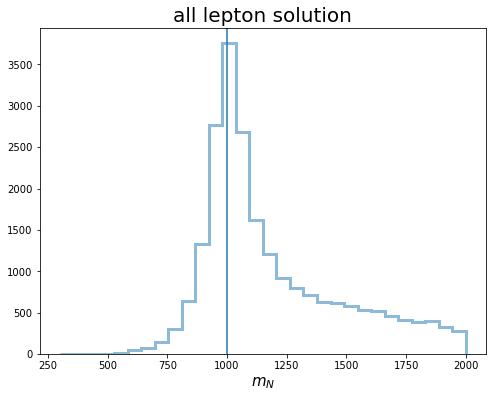

In [332]:
lt_m = []
lt_m += df_i['mN11'].dropna().tolist()
lt_m += df_i['mN12'].dropna().tolist()
lt_m += df_i['mN21'].dropna().tolist()
lt_m += df_i['mN22'].dropna().tolist()
lt_m = np.array(lt_m)

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)

range_ = [300, 2000]
bins_=30


plt.hist(lt_m, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0');
plt.axvline(1000)
# plt.axvline(1100)
# plt.axvline(900)


plt.title("all lepton solution", fontsize=20)
plt.xlabel(r"$m_N$", fontsize=15);

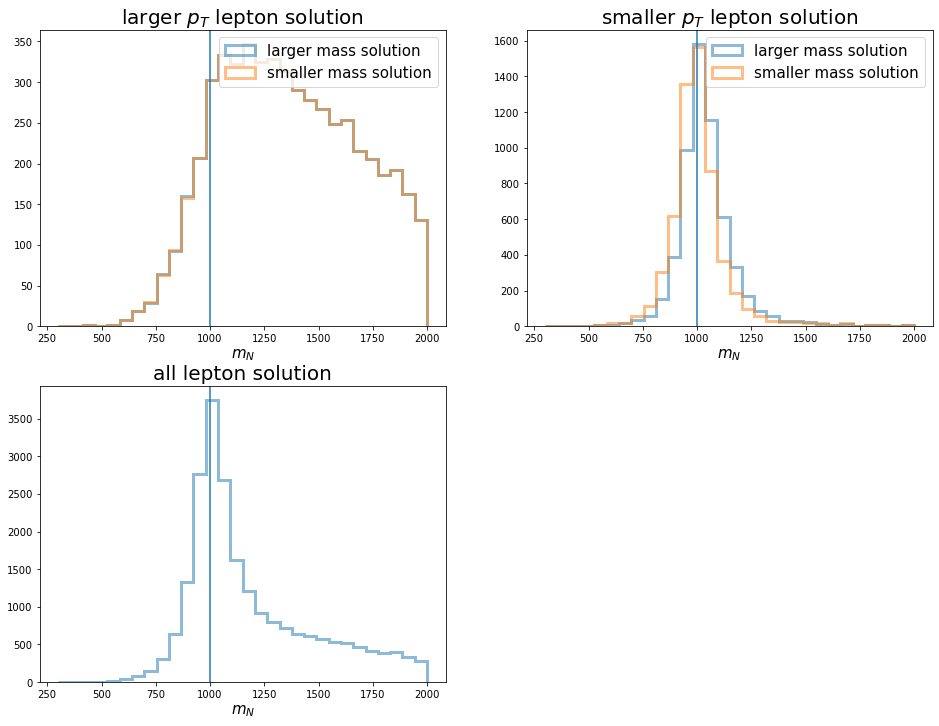

In [340]:
f = plt.figure(figsize=(16,12))

range_ = [300, 2000]
bins_=30

ax1 = plt.subplot(221)

ax1.hist(df_i[['mN11']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
ax1.hist(df_i[['mN12']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
ax1.axvline(1000)

ax1.legend(fontsize=15)
ax1.set_title(r"larger $p_T$ lepton solution", fontsize=20)
ax1.set_xlabel(r"$m_N$", fontsize=15);


ax2 = plt.subplot(222)

ax2.hist(df_i[['mN21']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
ax2.hist(df_i[['mN22']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
ax2.axvline(1000)

ax2.legend(fontsize=15)
ax2.set_title("smaller $p_T$ lepton solution", fontsize=20)
ax2.set_xlabel(r"$m_N$", fontsize=15);



ax3 = plt.subplot(223)
lt_m = []
lt_m += df_i['mN11'].dropna().tolist()
lt_m += df_i['mN12'].dropna().tolist()
lt_m += df_i['mN21'].dropna().tolist()
lt_m += df_i['mN22'].dropna().tolist()
lt_m = np.array(lt_m)

ax3.hist(lt_m, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
ax3.axvline(1000)

ax3.set_title("all lepton solution", fontsize=20)
ax3.set_xlabel(r"$m_N$", fontsize=15);


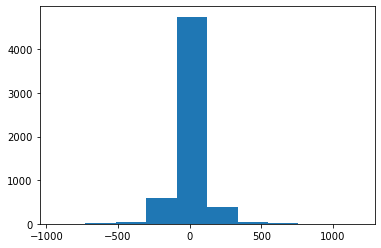

In [334]:
plt.hist(df_i['pxNu11'] - df_i['pxNuTrue']);

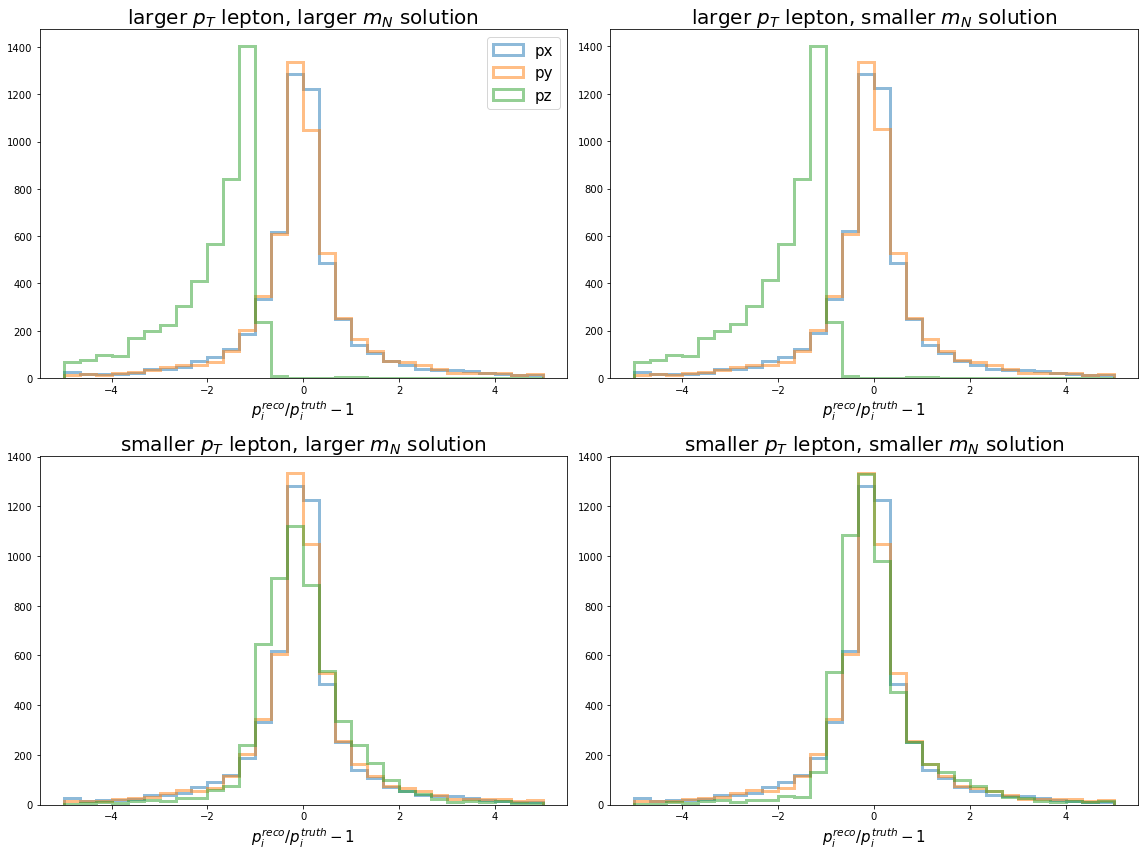

In [335]:
f = plt.figure(figsize=(16,12))

range_ = [-5, 5]
bins_=30

ax1 = plt.subplot(221)

ax1.hist(df_i['pxNu11'] / df_i['pxNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='px');
ax1.hist(df_i['pyNu11'] / df_i['pyNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='py');
ax1.hist(df_i['pzNu11'] / df_i['pzNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='pz');
# ax1.axvline(1000)

ax1.legend(fontsize=15)
ax1.set_title(r"larger $p_T$ lepton, larger $m_N$ solution", fontsize=20)
ax1.set_xlabel(r"$p_i^{reco}/p_i^{truth} - 1$", fontsize=15);


ax2 = plt.subplot(222)

ax2.hist(df_i['pxNu12'] / df_i['pxNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='px');
ax2.hist(df_i['pyNu12'] / df_i['pyNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='py');
ax2.hist(df_i['pzNu12'] / df_i['pzNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='pz');
# ax2.axvline(1000)

# ax2.legend(fontsize=15)
ax2.set_title(r"larger $p_T$ lepton, smaller $m_N$ solution", fontsize=20)
ax2.set_xlabel(r"$p_i^{reco}/p_i^{truth} - 1$", fontsize=15);


ax3 = plt.subplot(223)

ax3.hist(df_i['pxNu21'] / df_i['pxNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='px');
ax3.hist(df_i['pyNu21'] / df_i['pyNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='py');
ax3.hist(df_i['pzNu21'] / df_i['pzNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='pz');
# ax3.axvline(1000)

# ax3.legend(fontsize=15)
ax3.set_title(r"smaller $p_T$ lepton, larger $m_N$ solution", fontsize=20)
ax3.set_xlabel(r"$p_i^{reco}/p_i^{truth} - 1$", fontsize=15);


ax4 = plt.subplot(224)

ax4.hist(df_i['pxNu22'] / df_i['pxNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='px');
ax4.hist(df_i['pyNu22'] / df_i['pyNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='py');
ax4.hist(df_i['pzNu22'] / df_i['pzNuTrue'] - 1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='pz');
# ax4.axvline(1000)

# ax4.legend(fontsize=15)
ax4.set_title(r"smaller $p_T$ lepton, smaller $m_N$ solution", fontsize=20)
ax4.set_xlabel(r"$p_i^{reco}/p_i^{truth} - 1$", fontsize=15);

plt.tight_layout()


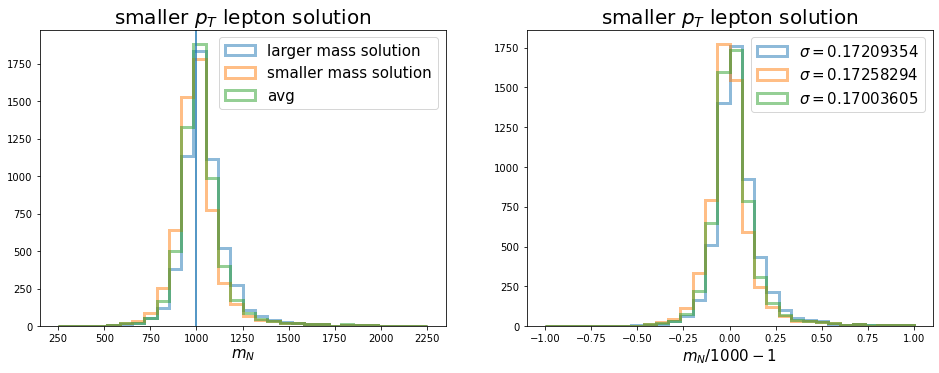

In [336]:
f = plt.figure(figsize=(16,12))

df_i['mN2_avg'] = (df_i['mN21'] + df_i['mN22'])/2

range_ = [250, 2250]
bins_=30

# ax1 = plt.subplot(221)

# ax1.hist(df_i[['mN11']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
# ax1.hist(df_i[['mN12']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
# ax1.axvline(1000)

# ax1.legend(fontsize=15)
# ax1.set_title(r"larger $p_T$ lepton solution", fontsize=20)
# ax1.set_xlabel(r"$m_N$", fontsize=15);


ax1 = plt.subplot(221)

ax1.hist(df_i[['mN21']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
ax1.hist(df_i[['mN22']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
ax1.hist(df_i[['mN2_avg']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='avg');
ax1.axvline(1000)

ax1.legend(fontsize=15)
ax1.set_title("smaller $p_T$ lepton solution", fontsize=20)
ax1.set_xlabel(r"$m_N$", fontsize=15);


ax2 = plt.subplot(222)

range_ = [-1, 1]
ax2.hist(df_i[['mN21']]/1000-1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label=r"$\sigma=$"+str(np.std(df_i[['mN21']]/1000-1).values[0]));
ax2.hist(df_i[['mN22']]/1000-1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label=r"$\sigma=$"+str(np.std(df_i[['mN22']]/1000-1).values[0]));
ax2.hist(df_i[['mN2_avg']]/1000-1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label=r"$\sigma=$"+str(np.std(df_i[['mN2_avg']]/1000-1).values[0]));
# ax2.axvline(1000)

ax2.legend(fontsize=15)
ax2.set_title("smaller $p_T$ lepton solution", fontsize=20)
ax2.set_xlabel(r"$m_N/1000 -1 $", fontsize=15);


# ax3 = plt.subplot(223)
# range_ = [300, 2000]

# ax3.hist(df_i[['mN2_avg']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
# ax3.hist(df_i[['mN22']]/1000-1, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
# ax2.axvline(1000)

# ax2.legend(fontsize=15)
# ax2.set_title("smaller $p_T$ lepton solution", fontsize=20)
# ax2.set_xlabel(r"$m_N/1000 -1 $", fontsize=15);


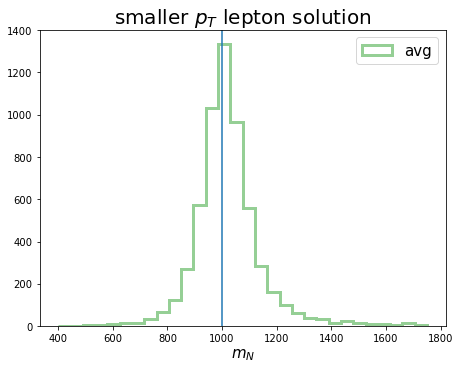

In [343]:
f = plt.figure(figsize=(16,12))

df_i['mN2_avg'] = (df_i['mN21'] + df_i['mN22'])/2

range_ = [400, 1750]
bins_=30

# ax1 = plt.subplot(221)

# ax1.hist(df_i[['mN11']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label='larger mass solution');
# ax1.hist(df_i[['mN12']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='smaller mass solution');
# ax1.axvline(1000)

# ax1.legend(fontsize=15)
# ax1.set_title(r"larger $p_T$ lepton solution", fontsize=20)
# ax1.set_xlabel(r"$m_N$", fontsize=15);


ax1 = plt.subplot(221)

ax1.hist(df_i[['mN2_avg']], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='avg');
ax1.axvline(1000)

ax1.legend(fontsize=15)
ax1.set_title("smaller $p_T$ lepton solution", fontsize=20)
ax1.set_xlabel(r"$m_N$", fontsize=15);



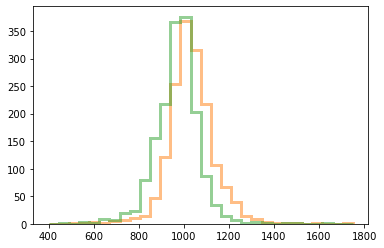

In [348]:

plt.hist(df_i[df_i.imbalance21>df_i.imbalance22]['mN21'], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='avg');
plt.hist(df_i[df_i.imbalance21>df_i.imbalance22]['mN22'], bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='avg');


# plt.hist(df_i[df_i.imbalance21>df_i.imbalance22]['mN21'])

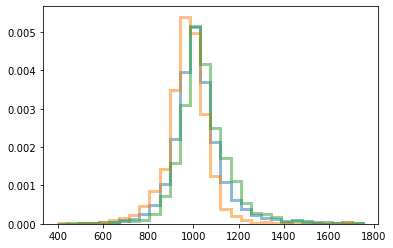

In [354]:
plt.hist(df_i[['mN2_avg']], density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label=r"$\sigma=$"+str(np.std(df_i[['mN2_avg']]/1000-1).values[0]));

plt.hist(df_i[df_i.imbalance21<df_i.imbalance22]['mN22'], density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='avg');
plt.hist(df_i[df_i.imbalance21<df_i.imbalance22]['mN21'], density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='avg');



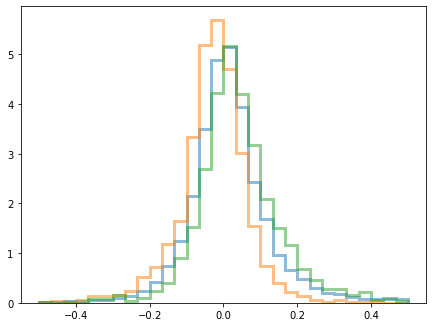

In [368]:
f = plt.figure(figsize=(16,12))


ax1 = plt.subplot(221)


range_=[-.5,.5]


ax1.hist(df_i[['mN2_avg']]/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label=r"$\sigma=$"+str(np.std(df_i[['mN2_avg']]/1000-1).values[0]));

plt.hist(df_i[df_i.imbalance21<df_i.imbalance22]['mN22']/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='avg');
ax1.hist(df_i[df_i.imbalance21<df_i.imbalance22]['mN21']/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', label='avg');



In [380]:
df_i['mN2_ib'] = np.nan
df_i.loc[df_i.imbalance21<df_i.imbalance22, 'mN2_ib'] = df_i[df_i.imbalance21<df_i.imbalance22]['mN21']
df_i.loc[df_i.imbalance21>df_i.imbalance22, 'mN2_ib'] = df_i[df_i.imbalance21>df_i.imbalance22]['mN22']


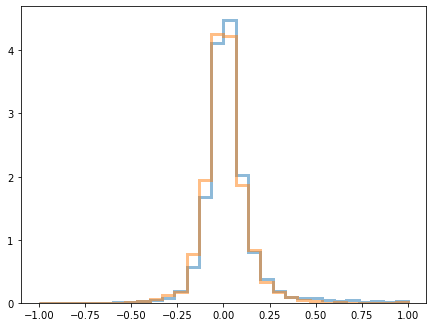

In [381]:
f = plt.figure(figsize=(16,12))


ax1 = plt.subplot(221)


range_=[-1,1]


ax1.hist(df_i[['mN2_avg']]/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', label=r"$\sigma=$"+str(np.std(df_i[['mN2_avg']]/1000-1).values[0]));

# ax1.hist(df_i[df_i.imbalance21<df_i.imbalance22]['mN22']/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='avg');
ax1.hist(df_i['mN2_ib']/1000-1, density=True, bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', label='avg');



In [382]:
np.std(df_i['mN2_ib']/1000-1)

0.12020902377468115

In [383]:
np.std(df_i['mN2_avg']/1000-1)

0.17003605